In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('drake_data.csv')

In [3]:
df.head()

,album,lyrics_title,lyrics_url,lyrics,track_views
0,Certified Lover Boy,Certified Lover Boy* Lyrics,https://genius.com/Drake-certified-lover-boy-l...,[Verse]\nPut my feelings on ice\nAlways been a...,8.7K
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,https://genius.com/Drake-like-im-supposed-to-d...,[Verse]\nHands are tied\nSomeone's in my ear f...,38.8K
2,Certified Lover Boy,Not Around Lyrics,https://genius.com/Drake-not-around-lyrics,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha...",129.8K
3,Certified Lover Boy,In the Cut (Ft. Roddy Ricch) Lyrics,https://genius.com/Drake-in-the-cut-lyrics,"[Intro: Drake]\nAyy, yeah\nPipe this shit up a...",72.1K
4,Certified Lover Boy,Zodiac Sign (Ft. Jessie Reyez) Lyrics,https://genius.com/Drake-zodiac-sign-lyrics,[Verse 1: Drake]\nYou ask how many girls I bee...,54.8K


In [4]:
df.drop('lyrics_url',1, inplace=True)

In [5]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-5-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
df.head(1)

,album,lyrics_title,lyrics,track_views
0,Certified Lover Boy,Certified Lover Boy* Lyrics,"[Verse]\nPut my feelings on ice\nAlways been a gem\nCertified lover boy, somehow still heartless\nHeart is only gettin' colder",8.7K


In [7]:
df1 = df.copy()

In [8]:
df1['lyrics'] = df1['lyrics'].astype(str)

In [9]:
df1['lyrics'] = df1['lyrics'].apply(lambda x : x.replace('\n',' '))


In [10]:
df1['lyrics'] = df1['lyrics'].apply(lambda x : re.sub('\[[^\]]*\]', '', x))

In [11]:
df1['lyrics'] = df1['lyrics'].apply(lambda x : re.sub('[^\w\s]','',x))

In [12]:
df1['lyrics'] = df1['lyrics'].apply(lambda x : re.sub('\w*\d\w*','',x))

In [13]:
df1.head()

,album,lyrics_title,lyrics,track_views
0,Certified Lover Boy,Certified Lover Boy* Lyrics,Put my feelings on ice Always been a gem Certified lover boy somehow still heartless Heart is only gettin colder,8.7K
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,Hands are tied Someones in my ear from the other side Tellin me that I should pay you no mind Wanted you to not be with me all night Wanted you to not stay with me all night I know you know who that person is to me Doesnt really change things I know youre scared of dating falling for me Shorty surely you know me Right here for you always You know I dont ever change Right here for you always You know I dont ever change Right here for you In mind you make me want to do things love you Like Im supposed to You make me want to love you Like Im supposed to You make me want to love you Like Im supposed to remind you Ayy I know youre scared of dating falling for me Shorty by now you know me Right here for you always You know I dont ever change Right here for you always You know I dont ever change Right here for you,38.8K
2,Certified Lover Boy,Not Around Lyrics,Yeah we back Wassup ladies Swishahouse baby Wassup to all the ladies on the Northside Southside Eastside Westside Wassup in Bay City Wassup to all the ladies in Louisiana Wassup to all the ladies in Dallas Austin San Antonio Marshall Prairie View its going down Wharton County Texas City HTown baby TSU ladies She moved out of state and shit done went left shes seekin forgiveness She used to dance but she want a loan and start up a business Her daddy is not around her momma is not around I watch her climb to the top of the pole and then get to slidin down I make it rain in this bitch I make it snow in this bitch She tryna get out of the mix Shawty is goin legit shawty is goin legit Me Im supportin this shit this is a story Came from my life and Im just recordin this shit Ima just give it to you direct instead of me throwin this shit You know you important and shit You know Im supportin this shit We used to do pornos when you would come over but now you got morals and shit I got like four on the wrist and an adorable kid I got the drac in the studio and I dont just mean that Im in this bitch Please make the most of this shit Dont just come close to some shit I give you this bread you run me some head And then you go glow up a bit She moved out of state and shit done went left shes seekin forgiveness She used to dance but she want a loan and start up a business Her daddy is not around her momma is not around I watch her climb to the top of the pole and then get to sli I make it rain in this bitch I make it snow in this bitch She tryna get out of the mix Shawty is goin legit shawty is goin legit Me Im supportin this shit this is a story Came from my life and Im just recordin this shit Her daddy is not around momma is definitely not around She got a business plan but she just aint had time to write it down Stay with her sister now she got a man but he out of town Soon as he out of town they hop in his whip and they ride around I watch her climb to the top of the pole and then get to slidin slidin Thought about trappin a player before but that just aint right right Look in the mirror if you wanna look at some things on the bright side You popped a you feelin too good to worry tonight She moved out of state and shit done went left shes seekin forgiveness She used to dance but she want a loan and start up a business Her daddy is not around her momma is not around I watch her climb to the top of the pole and then get to sli I make it rain in this bitch I make it snow in this bitch She tryna get out of the mix Shawty is goin legit shawty is goin legit Me Im supportin this shit this is a story Came for my life and Im just recordin this shit,129.8K
3,Certified Lover Boy,In the Cut (Ft. Roddy Ricch) Lyrics,Ayy yeah Pipe this shit up and I turn this shit up When I was down I was down Now them diamonds for fun like damn Ayy yeah Tre

In [14]:
test_df = df1.groupby('album').agg(lambda x: x.tolist())
test_df.drop(['lyrics_title','track_views'],1,inplace=True)
test_df['lyrics'] = test_df['lyrics'].apply(lambda x : ' '.join(x))
# test_df.head(1)

In [15]:
data_corpus = test_df.copy()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

In [17]:
data_ly = cv.fit_transform(data_corpus.lyrics)
data_dtm = pd.DataFrame(data_ly.toarray(), columns=cv.get_feature_names())

data_dtm.index = data_corpus.index
data_dtm.head()

,___,aa,aaliyah,aaliyahs,aaron,aberlour,ablaze,able,abridge,absolutely,...,zip,zippers,ziti,zo,zodiac,zoe,zombie,zone,zonin,zs
album,,,,,,,,,,,,,,,,,,,,,
Care Package,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Certified Lover Boy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Comeback Season,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
Dark Lane Demo Tapes,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drake Demo Disk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data = data_dtm.transpose()
data.head()

album,Care Package,Certified Lover Boy,Comeback Season,Dark Lane Demo Tapes,Drake Demo Disk,If You’re Reading This It’s Too Late,More Life,Nothing Was the Same,Room for Improvement,Scary Hours,Scorpion,So Far Gone,So Far Gone (EP),Take Care,Thank Me Later,The Best in the World Pack,Unreleased Songs,Views
___,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aa,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaliyah,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
aaliyahs,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
aaron,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
top_dict = {}
for c in data.columns:
    top =data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

In [37]:
[f'{i} = {top_dict[i][:5]}' for i in top_dict]

["Care Package = [('im', 115), ('know', 95), ('like', 90), ('yeah', 88), ('just', 88)]",
 "Certified Lover Boy = [('know', 33), ('im', 33), ('like', 32), ('just', 27), ('shit', 22)]",
 "Comeback Season = [('im', 210), ('like', 165), ('know', 107), ('dont', 93), ('aint', 78)]",
 "Dark Lane Demo Tapes = [('yeah', 128), ('know', 92), ('im', 90), ('ayy', 85), ('got', 66)]",
 "Drake Demo Disk = [('im', 22), ('like', 21), ('haters', 13), ('wanna', 13), ('break', 13)]",
 "If You’re Reading This It’s Too Late = [('im', 214), ('yeah', 114), ('know', 102), ('like', 98), ('got', 83)]",
 "More Life = [('im', 137), ('know', 113), ('yeah', 107), ('like', 104), ('just', 73)]",
 "Nothing Was the Same = [('just', 125), ('like', 101), ('know', 92), ('im', 91), ('dont', 89)]",
 "Room for Improvement = [('im', 129), ('like', 80), ('know', 80), ('uh', 76), ('just', 76)]",
 "Scary Hours = [('wishin', 26), ('like', 16), ('yeah', 13), ('things', 10), ('ayy', 9)]",
 "Scorpion = [('im', 124), ('yeah', 117), ('k

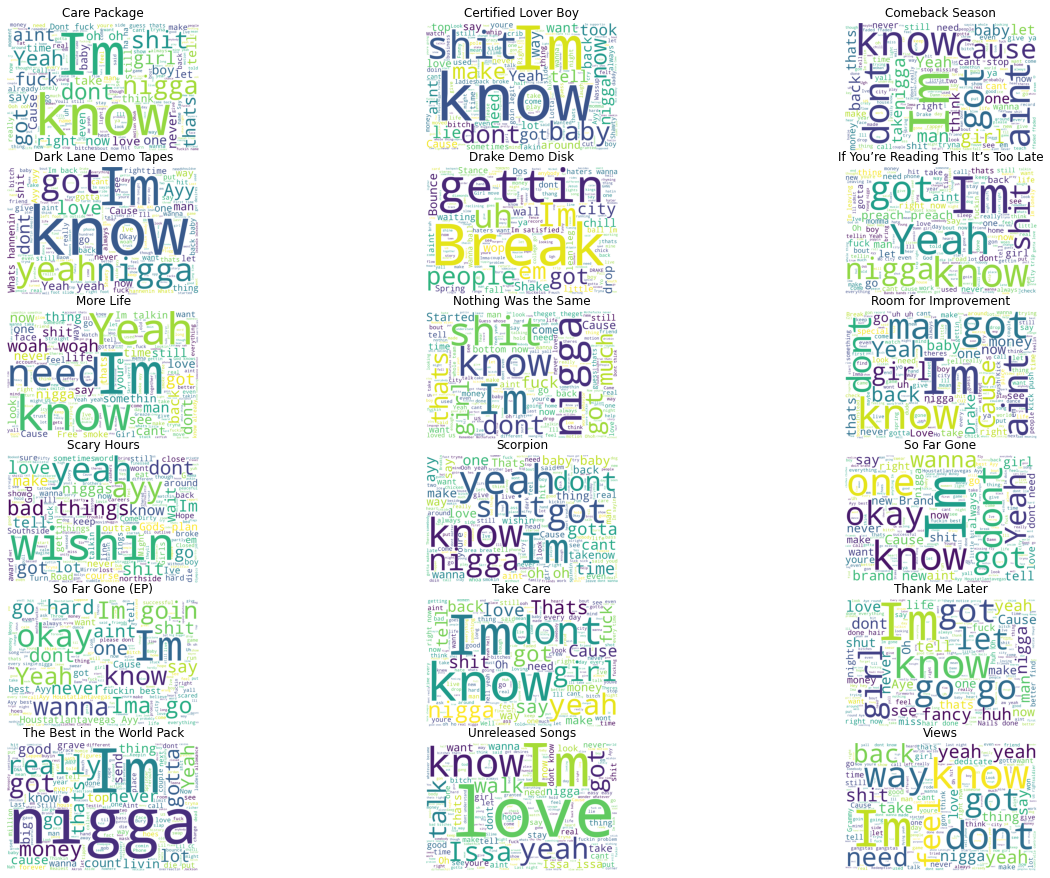

In [27]:
from wordcloud import WordCloud

fig = plt.figure(figsize = (25, 12))

for num,album in enumerate(data_corpus.index):

    axs = fig.add_subplot(6, 3, num+1, facecolor = None)
    
    wordcloud = WordCloud(width = 1800, height = 1200, 
                    background_color ='white', 
                    min_font_size = 10).generate(data_corpus.lyrics[album]) 
    
    axs.imshow(wordcloud) 
    plt.axis("off")
    plt.title(album)
    plt.tight_layout(pad = 0) 

plt.show() 